## Imports & Installs

In [1]:
# module installieren

# import sys
# !{sys.executable} -m pip install librosa numpy matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
from IPython.display import Audio

## Matrizen & `imshow`

In [3]:
a = np.array([[0, 0, 1, 0, 0],
              [0, 1, 0, 1, 0],
              [1, 0, 0, 0, 1],
              [0, 1, 0, 1, 0],
              [0, 0, 1, 0, 0]])

a

array([[0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0],
       [0, 0, 1, 0, 0]])

---

Das `shape`-Attribut bei Numpy-Arrays gibt in einem Tuple aus, wie viele Elemente sich in der jeweiligen Dimension befinden.

Bei unserem `a`-Array sind es fünf Zeilen und fünf Spalten

In [4]:
a.shape

(5, 5)

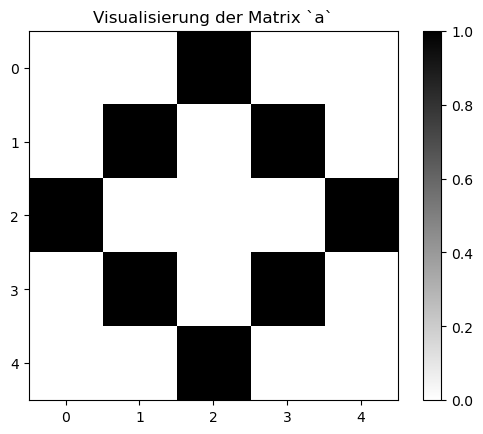

In [5]:
plt.imshow(a, cmap='gray_r')
plt.title('Visualisierung der Matrix `a`')
plt.colorbar()
plt.show()

### mehrdimensionale Arrays indizieren

In [6]:
# array([[0, 0, 1, 0, 0],
#        [0, 1, 0, 1, 0],
#        [1, 0, 0, 0, 1],
#        [0, 1, 0, 1, 0],
#        [0, 0, 1, 0, 0]])


print(a[:3])
print()
print(a[1, 1])
print()
print(a[1][1])
print()
print(a[:, :3])
print()
print(a[1:3, 3:5])

[[0 0 1 0 0]
 [0 1 0 1 0]
 [1 0 0 0 1]]

1

1

[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]]

[[1 0]
 [0 1]]


### Audio-Beispiel

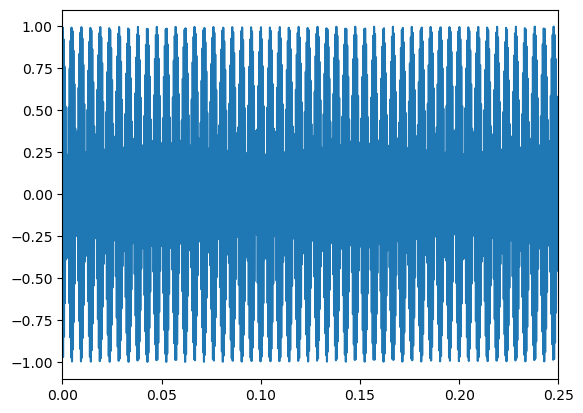

In [7]:
sr = 44100 # sampling rate in Hz
length = 2.0 # in sec
freq1 = 2000 # in Hz
freq2 = 2210 # in Hz

t = np.linspace(0, length, num=int(sr * length))

y = (np.sin(2 * np.pi * t * freq1))# * 0.5)
y = y + (np.sin(2 * np.pi * t * freq2))# * 0.5)

# normalisieren
y = y / np.max(np.abs(y))

# quarter_sec = int(sr / 4)
# plt.plot(t[:quarter_sec], y[:quarter_sec])

plt.plot(t, y)
plt.xlim(0, 0.25)
plt.show()

display(Audio(y, rate=sr))

### eindimensionale Arrays indizieren

In [8]:
print(y[:10])
print(y[88190:])
print(y[-10:])

[0.         0.29541638 0.56426942 0.78240734 0.93028052 0.99471056
 0.97007631 0.85880893 0.67115218 0.42421136]
[-4.24211365e-01 -6.71152185e-01 -8.58808928e-01 -9.70076306e-01
 -9.94710564e-01 -9.30280521e-01 -7.82407342e-01 -5.64269418e-01
 -2.95416377e-01 -2.09704024e-12]
[-4.24211365e-01 -6.71152185e-01 -8.58808928e-01 -9.70076306e-01
 -9.94710564e-01 -9.30280521e-01 -7.82407342e-01 -5.64269418e-01
 -2.95416377e-01 -2.09704024e-12]


In [9]:
# shape eines ein-dimensionalen arrays:
t.shape

(88200,)

### Spektrogramm berechnen mit `lr.stft`

(STFT steht für Short-time Fourier Transform)

In [10]:
stft = lr.stft(y=y)

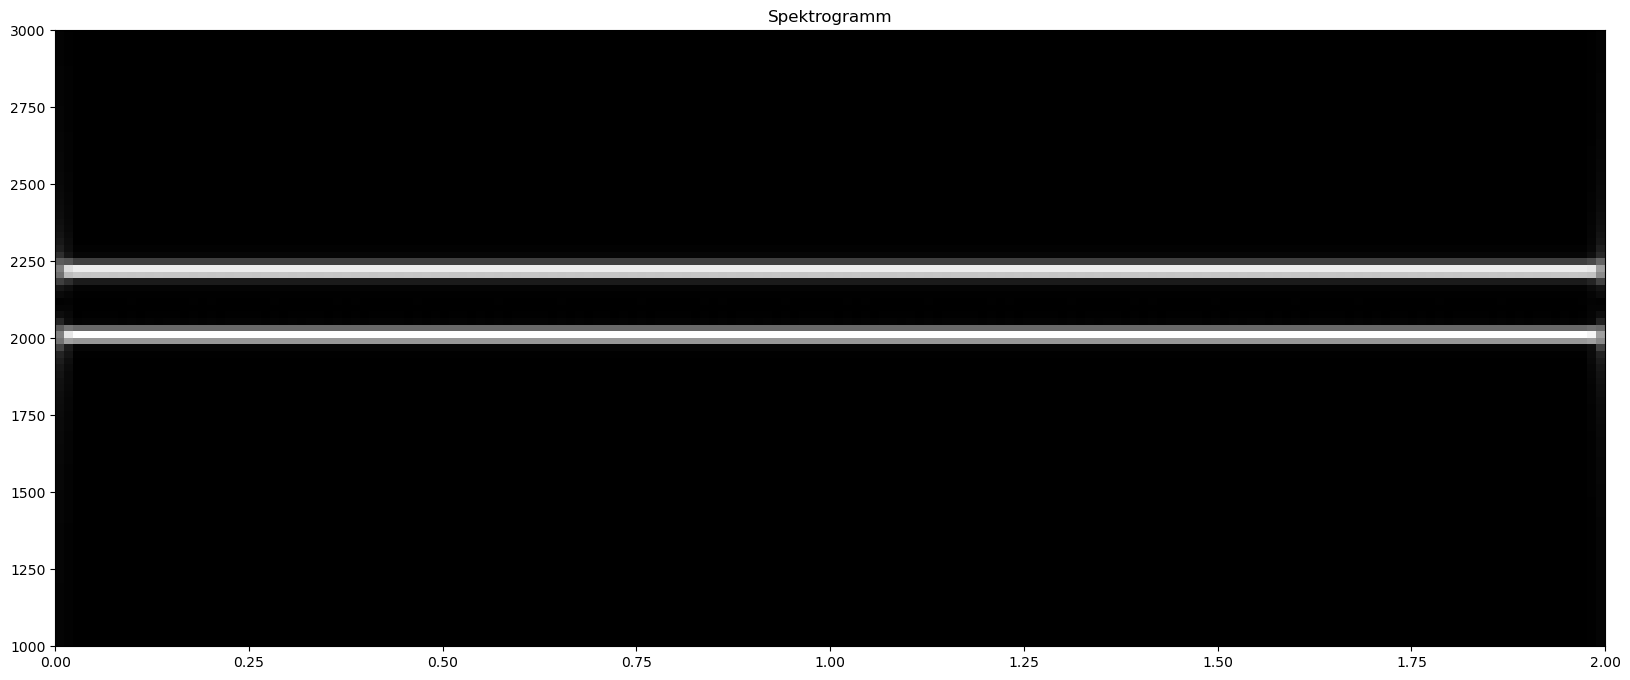

In [11]:
plt.figure(figsize=(20, 8))
plt.imshow(np.abs(stft), # stft beinhaltet eigentlich komplexe Zahlen. In Spektrogrammen werden typischerweise die Magnituden (bzw. absoluten Werte) dargestellt.
           aspect='auto', # dafür sorgen, dass das Bild an die Größe der Grafik angepasst wird.
           origin='lower', # dafür sorgen, dass die tiefste Frequenz unten dargestellt wird (flip y-axis)
           cmap='gray', # color-map einstellen
           extent=[0, length, 0, sr / 2])
plt.ylim(1000, 3000)
plt.title('Spektrogramm')
plt.show()

## Übungsaufgabe bis nächste Woche

Ladet mit der lunktion `lr.load` (Verwendung in der Cokumentation nachsehen;
achtet darauf, was die Funktion ausgibt!!!!) irgendeine Audio-Datei und
analysiert sie mit der `stft`-Funktion und stellt das Spektrogramm visuell
mit der `imshow`-Funktion dar.